# Import all needed Libraries/Module

In [1]:
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np

In [6]:
data = pd.read_csv('../Data/after_preprocessing.csv')

In [7]:
x=data.drop('calories_to_maintain_weight',axis=1)
y=data['calories_to_maintain_weight']

Normalization dapat mengontrol proses normalisasi secara fleksibel, seperti menentukan nilai rata-rata dan deviasi standar yang diinginkan, atau menggunakan statistik empiris dari data pelatihan. Normalisasi ini membantu dalam menjaga skala data yang konsisten, mempercepat konvergensi model, dan menghindari masalah gradien yang tidak stabil.

In [8]:
normalizer = tf.keras.layers.experimental.preprocessing.Normalization(input_shape=(x.shape[1],),axis=-1)
normalizer.adapt(np.array(x))
print(normalizer.mean.numpy())

[2.6778576e+01 6.1647728e+01 1.5402758e+00 5.1948535e-01 2.4788317e+01
 1.4420499e+03 1.4874511e+00]


In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape,y_train.shape

((8580, 7), (8580,))

In [19]:
model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(64, activation='relu', input_shape=[(8580, 7)]),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1, activation='linear'),
])
model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),)
history=model.fit(x_train, y_train, epochs=200, batch_size=4,
                  validation_split=0.2)

Epoch 1/200
1716/1716 [==============================] - 1s 839us/step - loss: 1550.5226 - val_loss: 129.2668
Epoch 2/200
1716/1716 [==============================] - 1s 718us/step - loss: 54.9756 - val_loss: 71.7193
Epoch 3/200
1716/1716 [==============================] - 1s 704us/step - loss: 47.0488 - val_loss: 54.8846
Epoch 4/200
1716/1716 [==============================] - 1s 717us/step - loss: 45.3341 - val_loss: 48.7795
Epoch 5/200
1716/1716 [==============================] - 1s 797us/step - loss: 45.3642 - val_loss: 55.4710
Epoch 6/200
1716/1716 [==============================] - 1s 714us/step - loss: 44.5411 - val_loss: 53.0434
Epoch 7/200
1716/1716 [==============================] - 1s 709us/step - loss: 45.7013 - val_loss: 48.8319
Epoch 8/200
1716/1716 [==============================] - 1s 705us/step - loss: 45.1813 - val_loss: 30.3994
Epoch 9/200
1716/1716 [==============================] - 1s 710us/step - loss: 45.3213 - val_loss: 35.9904
Epoch 10/200
1716/1716 [==========

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def plot_loss(history,start,end):
  x_index=[x for x in range (start,end)]
  plt.plot(x_index,history.history['loss'][start-1:end-1], label='loss')
  plt.plot(x_index,history.history['val_loss'][start-1:end-1], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss MAE')
  plt.title(f'Loss betweeh epoch {start} and {end}')
  plt.legend()
  plt.grid(True)
  plt.show()

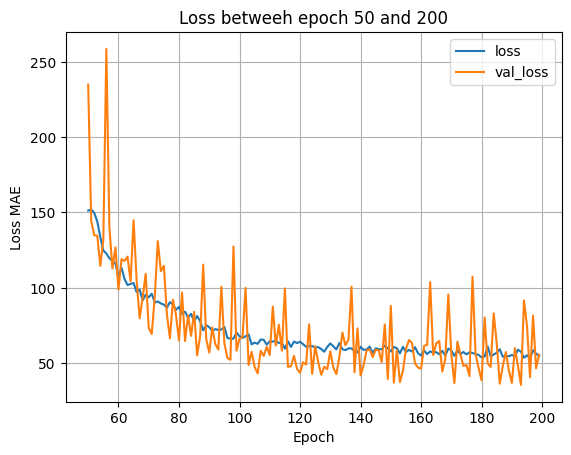

In [17]:
plot_loss(history,50,200)

In [18]:
model.evaluate(x_test,y_test)

68/68 [==============================] - 0s 628us/step - loss: 38.9988


38.99882125854492

In [12]:
predict=model.predict(x_test)
predict.squeeze()

array([1529.3469, 1838.1575, 1466.7944, ..., 2104.2021, 2083.9375,
       1460.2761], dtype=float32)

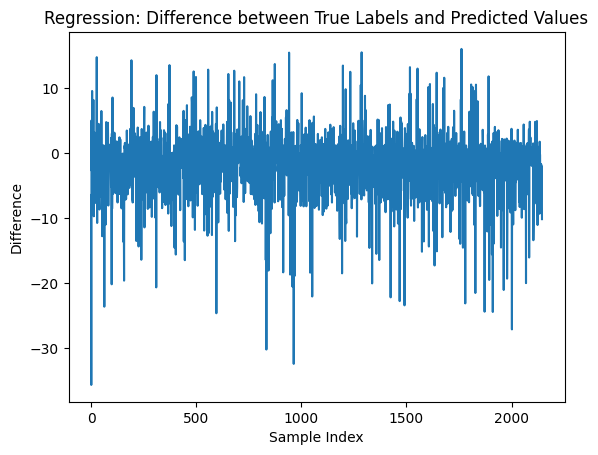

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have your true labels in a NumPy array called 'y_true'
# Assuming you have your predicted values in a NumPy array called 'y_pred'

# Calculate the difference between true labels and predicted values
diff = y_test - predict.squeeze()

# Plotting the difference
plt.plot(np.arange(len(diff)), diff)
plt.xlabel('Sample Index')
plt.ylabel('Difference')
plt.title('Regression: Difference between True Labels and Predicted Values')
plt.show()


In [14]:
diff.describe()

count    2146.000000
mean       -1.783319
std         4.940824
min       -35.693971
25%        -3.892978
50%        -1.259424
75%         1.049507
max        16.058657
Name: calories_to_maintain_weight, dtype: float64

hasil= y true - predict

* y true= data asli -> y_test
* predict= data prediksi -> hasil predict model terhadap x_test

if hasil<0 -> kalori yg diprediksi berlebihan

if hasil >0 -> kalori yg diprediksi kurang

In [15]:
sorted(diff) #jumlah kalori yang diprediksi berlebih

[-35.69397070312493,
 -32.451091992187685,
 -30.242751757812584,
 -27.14088554687487,
 -24.654923828124993,
 -24.456376953125073,
 -24.414593750000222,
 -23.643120117187436,
 -23.43681874999993,
 -23.136517578125222,
 -22.7832824218749,
 -22.20804492187517,
 -22.073666015624894,
 -21.534599609375164,
 -21.0693359375,
 -20.670703124999818,
 -20.556289062500127,
 -20.193855468749916,
 -20.059734375000062,
 -20.012694140624717,
 -19.632125781250124,
 -19.52380468750016,
 -19.323335937499905,
 -18.921083984374945,
 -18.697898437500044,
 -18.508363281249785,
 -18.40142773437492,
 -18.354511328125227,
 -18.079778515625094,
 -17.297685156249827,
 -16.477319726562655,
 -16.4557695312501,
 -16.45308789062483,
 -16.413046874999964,
 -16.069507812499978,
 -15.614365234374873,
 -15.591182421874919,
 -15.507570312499865,
 -15.177245312499963,
 -15.113347656249971,
 -14.59210253906258,
 -14.555374999999913,
 -14.552658203124793,
 -14.53341601562488,
 -14.375920703124848,
 -14.36829648437515,
 -13.95

In [16]:
sorted(diff, reverse=True) #jumlah kalori yang diprediksi kekurangan kalori

[16.058657226562445,
 15.533884179687448,
 15.486425976562487,
 14.784744335937603,
 14.308828320312386,
 13.733215624999957,
 13.562775976562534,
 13.495439648437468,
 13.246403320312538,
 13.030140625000058,
 12.86902343749989,
 12.701613867187461,
 12.592178320312314,
 12.535100000000057,
 12.394402929687658,
 12.19721035156249,
 12.014731640625087,
 11.832292968749925,
 11.73647070312495,
 11.710916796875154,
 11.620042968750113,
 11.22789687500017,
 11.055625585937605,
 10.653680859375072,
 10.57698320312511,
 10.55638847656246,
 10.498566992187534,
 10.189141601562596,
 10.168820507812597,
 10.040437500000053,
 9.854387695312425,
 9.6189257812498,
 9.582008398437438,
 9.235719726562593,
 9.18413144531246,
 9.163310351562586,
 9.075579101562425,
 8.840278906250205,
 8.656313281249822,
 8.601248046875071,
 8.575716796874985,
 8.301446679687388,
 8.277597656250009,
 8.20089648437488,
 8.16163046874999,
 8.159443945312432,
 7.995257031249821,
 7.89262128906239,
 7.788022265625386,
 7